In [1]:
#! /usr/bin/env python

from __future__ import print_function
import os
import numpy as np
#from read_psf_cats import read_data, band_combinations
import fitsio
import treecorr
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
from astropy.io import fits

In [2]:
prefix='piff' #'psfex'

#reserve stars catalogue with Piff solutions
data = fitsio.read('/global/homes/m/mjarvis/desdata/users/mjarvis/y3a1-v29/psf_y3a1-v29.fits')
#print(data)
h = fitsio.read_header('/global/homes/m/mjarvis/desdata/users/mjarvis/y3a1-v29/psf_y3a1-v29.fits')
print(h)
band=data['band']
thisband="i"
data=data[np.where(band ==thisband)]
print(len(data))
#print(data[:100])
data = data[data['ra'].argsort()][:100000]
#print(data)
print(len(data))

rastarcat = data['ra']
rastarcat[rastarcat > 180] -= 360
decstarcat = data['dec'] 




SIMPLE  =                    T / file does conform to FITS standard
BITPIX  =                   16 / number of bits per data pixel
NAXIS   =                    0 / number of data axes
EXTEND  =                    T / FITS dataset may contain extensions
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H
13434631
100000


In [3]:
#real stars with their magnnitudes to match
catname = '/global/cscratch1/sd/troxel/cats_des_y3/Y3_mastercat_v2_6_20_18.h5' #_subsampled

import h5py
#h = fitsio.read_header(catname)
f = h5py.File(catname,'r')
print(f['catalog'].keys())
print(f['catalog/gold'].keys())

#FLAGS_GOLD  If you are using SExtractor quantities, you should add (FLAGS_GOLD & 1111000) = 0; and (FLAGS_BADREGIONS & 01) = 0

gflag = np.array(f['catalog/gold/flags_gold'])
print(gflag)
#star_mask = np.array((f['catalog/gold/flags_gold'] == 0 ) and(f['catalog/gold/flags_gold/flags_badregions'] == 0))
#print(star_mask)                
              
#ra = np.array(f['catalog/gold/ra'])

ra = np.array(f['catalog/gold/ra'])#[star_mask] 
dec = np.array(f['catalog/gold/dec'])#[star_mask]
print(len(ra))
zeropt=31
r = zeropt- 2.5*np.log10(np.array(f['catalog/gold/sof_cm_flux_corrected_r']))#[star_mask]
i = zeropt- 2.5*np.log10(np.array(f['catalog/gold/sof_cm_flux_corrected_i']))#[star_mask]
z = zeropt- 2.5*np.log10(np.array(f['catalog/gold/sof_cm_flux_corrected_z']))#[star_mask]

print(len(r))
ra=ra[np.where((r<30) & (r>0))]
dec=dec[np.where((r<30)& (r>0))]
i=i[np.where((r<30)& (r>0))]
z=z[np.where((r<30)& (r>0))]
r=r[np.where((r<30)& (r>0))]

print(len(r))
ra=ra[np.where((i<30) & (i>0))]
dec=dec[np.where((i<30)& (i>0))]
z=z[np.where((i<30)& (i>0))]
r=r[np.where((i<30)& (i>0))]
i=i[np.where((i<30)& (i>0))]

ra[ra > 180] -= 360

gold=np.column_stack((ra,dec,r,i,z))
print(gold)
#gold = gold[gold[:,0].argsort()][:1000000]
print(gold)
print(len(gold))
goldra=gold[:,0]
golddec=gold[:,1]
goldr=gold[:,2]
goldi=gold[:,3]
goldz=gold[:,4]
"""metacal_mask = np.array(f['index/select'])

#ra = np.array(f['catalog/gold/ra'])[metacal_mask]
#dec = np.array(f['catalog/gold/dec'])[metacal_mask]
ra = np.array(f['catalog/metacal/unsheared/ra'])[metacal_mask]
dec = np.array(f['catalog/metacal/unsheared/dec'])[metacal_mask]
R11 = np.array(f['catalog/metacal/unsheared/R11'])[metacal_mask]
R22 = np.array(f['catalog/metacal/unsheared/R22'])[metacal_mask]
meanR11 = np.mean(R11)
meanR22 = np.mean(R22)
e1 = np.array(f['catalog/metacal/unsheared/e_1'])[metacal_mask]
e2 = np.array(f['catalog/metacal/unsheared/e_2'])[metacal_mask]
g1 = e1/meanR11
g2 = e2/meanR22
psfe1 = np.array(f['catalog/metacal/unsheared/psf_e1'])[metacal_mask]
psfe2 = np.array(f['catalog/metacal/unsheared/psf_e2'])[metacal_mask]
psfT = np.array(f['catalog/metacal/unsheared/psf_T'])[metacal_mask]
ri = np.array(f['catalog/metacal/unsheared/flux_r'])[metacal_mask] - np.array(f['catalog/metacal/unsheared/psf_T'])[metacal_mask]"""

[u'metacal', u'gold', u'bpz', u'dnf', u'redmagic', u'redmapper']
[u'a_sed_sfd98_g', u'a_sed_sfd98_i', u'a_sed_sfd98_r', u'a_sed_sfd98_z', u'coadd_object_id', u'dec', u'delta_mag_chrom_g', u'delta_mag_chrom_i', u'delta_mag_chrom_r', u'delta_mag_chrom_z', u'delta_mag_y4_g', u'delta_mag_y4_i', u'delta_mag_y4_r', u'delta_mag_y4_z', u'ebv_sfd98', u'flags', u'flags_badregions', u'flags_footprint', u'flags_foreground', u'flags_gold', u'flags_phot', u'hpix_16384', u'n_images_g', u'n_images_i', u'n_images_r', u'n_images_z', u'ra', u'sextractor_flags_g', u'sextractor_flags_i', u'sextractor_flags_r', u'sextractor_flags_z', u'sof_cm_flux_corrected_g', u'sof_cm_flux_corrected_i', u'sof_cm_flux_corrected_r', u'sof_cm_flux_corrected_z', u'sof_cm_flux_err_g', u'sof_cm_flux_err_i', u'sof_cm_flux_err_r', u'sof_cm_flux_err_z', u'sof_cm_mag_corrected_g', u'sof_cm_mag_corrected_i', u'sof_cm_mag_corrected_r', u'sof_cm_mag_corrected_z', u'sof_cm_mag_err_g', u'sof_cm_mag_err_i', u'sof_cm_mag_err_r', u'sof_cm_

/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in log10
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log10
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in log10


399263026


/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in less
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in greater
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in less
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in greater
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in less
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in greater
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in le

386188057


/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in less
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in greater
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in less
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in greater
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in greater
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in le

[[  4.50014413e+01   3.70761157e-03   2.29896551e+01   2.26150501e+01
    2.22456644e+01]
 [  4.49972535e+01   1.04404433e-02   2.28234535e+01   2.16837332e+01
    2.11906007e+01]
 [  4.49971163e+01   9.44756779e-03   2.40809067e+01   2.42646955e+01
    2.35322793e+01]
 ..., 
 [ -4.36099674e+01  -1.18839131e+00   2.59294658e+01   2.39473335e+01
    2.35773147e+01]
 [ -4.36099435e+01  -1.18586508e+00   2.72731173e+01   2.44795196e+01
    2.40166985e+01]
 [ -4.36069619e+01  -1.18399895e+00   2.15802013e+01   2.14590621e+01
    2.13480711e+01]]
[[  4.50014413e+01   3.70761157e-03   2.29896551e+01   2.26150501e+01
    2.22456644e+01]
 [  4.49972535e+01   1.04404433e-02   2.28234535e+01   2.16837332e+01
    2.11906007e+01]
 [  4.49971163e+01   9.44756779e-03   2.40809067e+01   2.42646955e+01
    2.35322793e+01]
 ..., 
 [ -4.36099674e+01  -1.18839131e+00   2.59294658e+01   2.39473335e+01
    2.35773147e+01]
 [ -4.36099435e+01  -1.18586508e+00   2.72731173e+01   2.44795196e+01
    2.40166985e

"metacal_mask = np.array(f['index/select'])\n\n#ra = np.array(f['catalog/gold/ra'])[metacal_mask]\n#dec = np.array(f['catalog/gold/dec'])[metacal_mask]\nra = np.array(f['catalog/metacal/unsheared/ra'])[metacal_mask]\ndec = np.array(f['catalog/metacal/unsheared/dec'])[metacal_mask]\nR11 = np.array(f['catalog/metacal/unsheared/R11'])[metacal_mask]\nR22 = np.array(f['catalog/metacal/unsheared/R22'])[metacal_mask]\nmeanR11 = np.mean(R11)\nmeanR22 = np.mean(R22)\ne1 = np.array(f['catalog/metacal/unsheared/e_1'])[metacal_mask]\ne2 = np.array(f['catalog/metacal/unsheared/e_2'])[metacal_mask]\ng1 = e1/meanR11\ng2 = e2/meanR22\npsfe1 = np.array(f['catalog/metacal/unsheared/psf_e1'])[metacal_mask]\npsfe2 = np.array(f['catalog/metacal/unsheared/psf_e2'])[metacal_mask]\npsfT = np.array(f['catalog/metacal/unsheared/psf_T'])[metacal_mask]\nri = np.array(f['catalog/metacal/unsheared/flux_r'])[metacal_mask] - np.array(f['catalog/metacal/unsheared/psf_T'])[metacal_mask]"

In [4]:
from astropy.coordinates import SkyCoord
from astropy import units as u

goldcat = SkyCoord(ra=goldra*u.degree, dec=golddec*u.degree)  
catalog = SkyCoord(ra=rastarcat*u.degree, dec=decstarcat*u.degree)  
idx, d2d, d3d = catalog.match_to_catalog_sky(goldcat, nthneighbor=1) 

print(goldra[idx])

print(rastarcat)

[  1.39214814e-05  -3.10869540e-03   7.40334900e-05 ...,   1.91127046e+00
   1.91132894e+00   1.91133284e+00]
[  5.47103130e-05   6.70257045e-05   7.96452777e-05 ...,   1.91130217e+00
   1.91130595e+00   1.91131315e+00]


100000
[0d00m00.1487s 0d00m07.2095s 0d00m00.0296s ..., 0d00m00.0621s 0d00m00.0555s
 0d00m00.0823s]
[ 0.14868309  7.20949388  0.02964085 ...,  0.06206635  0.05554605
  0.08231933]


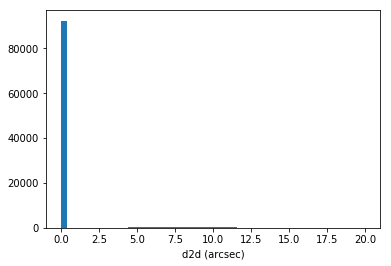

In [5]:
print(len(d2d))  
print(d2d)
print(d2d.arcsecond)
plt.hist(d2d.arcsecond, 50, range=(0, 20)) #, normed=1, alpha=0.75)
plt.xlabel('d2d (arcsec)')

100000
[0d00m00.1487s 0d00m07.2095s 0d00m00.0296s ..., 0d00m00.0621s 0d00m00.0555s
 0d00m00.0823s]
[ 0.14868309  7.20949388  0.02964085 ...,  0.06206635  0.05554605
  0.08231933]


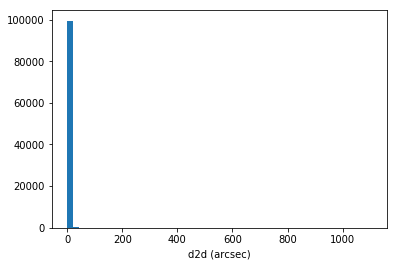

In [6]:
print(len(d2d))  
print(d2d)
print(d2d.arcsecond)
plt.hist(d2d.arcsecond, 50) #, normed=1, alpha=0.75)
plt.xlabel('d2d (arcsec)')

[0d00m07.2095s 0d00m06.2187s 0d00m06.6065s ..., 0d00m09.3788s 0d00m07.2039s
 0d00m06.2446s]
92345


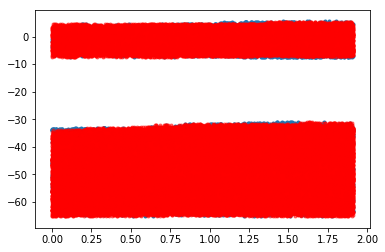

In [7]:
matchlim=2*u.arcsecond
print(d2d[d2d > matchlim])  
print(len(d2d[d2d < matchlim]))  


plt.scatter(rastarcat[np.where(d2d >matchlim)],decstarcat[np.where(d2d > matchlim)], marker='.')
plt.scatter(rastarcat[np.where(d2d < matchlim)],decstarcat[np.where(d2d < matchlim)], marker='.', color="red", alpha=0.5)

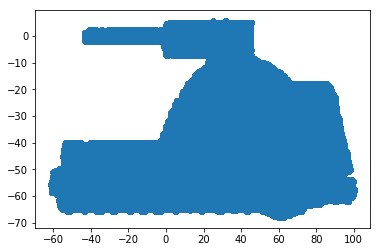

In [8]:
plt.scatter(goldra,golddec, marker='.')

[0d00m07.2095s 0d00m06.2187s 0d00m06.6065s ..., 0d00m09.3788s 0d00m07.2039s
 0d00m06.2446s]
92345
[  1.39214814e-05   7.40334900e-05   2.27454942e-04 ...,   1.91127046e+00
   1.91132894e+00   1.91133284e+00]
[  5.47103130e-05   7.96452777e-05   2.22832679e-04 ...,   1.91130217e+00
   1.91130595e+00   1.91131315e+00]
-0.00310869540198 1.91562798247
5.4710312952e-05 1.91131315247


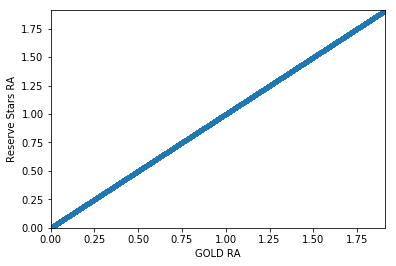

In [9]:
matchlim=2*u.arcsecond
print(d2d[d2d > matchlim])  
print(len(d2d[d2d < matchlim]))  
print(goldra[idx][np.where(d2d < matchlim)])
print(rastarcat[np.where(d2d < matchlim)])
#plt.scatter(goldra[idx], rastarcat, marker='.')
plt.scatter(goldra[idx][np.where(d2d < matchlim)],rastarcat[np.where(d2d < matchlim)], marker='.')
plt.xlabel('GOLD RA')
plt.ylabel('Reserve Stars RA')
plt.ticklabel_format(useOffset=False)
plt.xlim(min(goldra[idx][np.where(d2d < matchlim)]),max(goldra[idx][np.where(d2d < matchlim)]) )
plt.ylim(min(rastarcat[np.where(d2d < matchlim)]),max(rastarcat[np.where(d2d < matchlim)]) )
print(min(goldra[idx]),max(goldra[idx]) )
print(min(rastarcat),max(rastarcat) )

-0.00310869540198 1.91562798247
5.4710312952e-05 1.91131315247


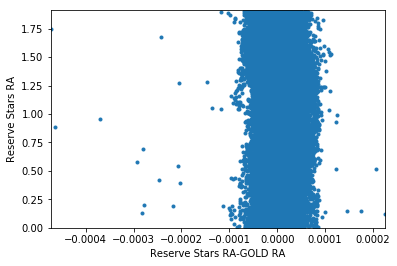

In [10]:
plt.scatter(rastarcat[np.where(d2d < matchlim)]-goldra[idx][np.where(d2d < matchlim)],rastarcat[np.where(d2d < matchlim)], marker='.')
plt.xlabel('Reserve Stars RA-GOLD RA')
plt.ylabel('Reserve Stars RA')
plt.ticklabel_format(useOffset=False)
#plt.xlim(min(goldra[idx][np.where(d2d < matchlim)]),max(goldra[idx][np.where(d2d < matchlim)]) )
plt.ylim(min(rastarcat[np.where(d2d < matchlim)]),max(rastarcat[np.where(d2d < matchlim)]) )
plt.xlim(min(rastarcat[np.where(d2d < matchlim)]-goldra[idx][np.where(d2d < matchlim)]),max(rastarcat[np.where(d2d < matchlim)]-goldra[idx][np.where(d2d < matchlim)]) )
print(min(goldra[idx]),max(goldra[idx]) )
print(min(rastarcat),max(rastarcat) )

'print(idx, d2d, d3d)\nprint("length of star cat: ", len(rastarcat))\nprint("length of gold cat: ", len(ra))\nprint("length of matched indices: ", len(idx))\nprint(rastarcat[idx])\nprint(ra)\nprint(data[\'obs_e1\'])'

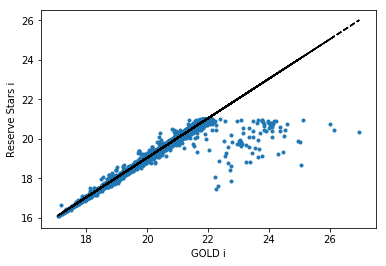

In [11]:
fit = np.polyfit(goldi[idx][np.where(d2d < matchlim)], data['mag'][np.where(d2d < matchlim)], 1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(goldi[idx][np.where(d2d < matchlim)], fit_fn(goldi[idx][np.where(d2d < matchlim)]), '--k')

plt.scatter(goldi[idx][np.where(d2d < matchlim)], data['mag'][np.where(d2d < matchlim)], marker='.')
plt.xlabel('GOLD i')
plt.ylabel('Reserve Stars i')


"""print(idx, d2d, d3d)
print("length of star cat: ", len(rastarcat))
print("length of gold cat: ", len(ra))
print("length of matched indices: ", len(idx))
print(rastarcat[idx])
print(ra)
print(data['obs_e1'])"""

[ 19.36851732  19.1308784   20.46158282 ...,  22.98513971  20.01145287
  22.54903938] [ 17.34756088  17.14143372  18.68042755 ...,  20.49674225  18.99808884
  20.55290794]


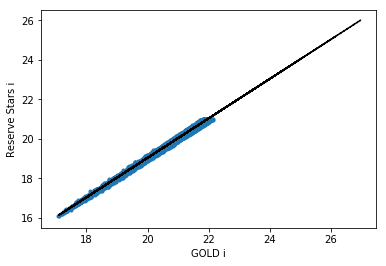

In [12]:
tolerance=0.2
thisgoldi=goldi[idx][np.where(d2d < matchlim)]
thisgoldr=goldr[idx][np.where(d2d < matchlim)]
thismag=data['mag'][np.where(d2d < matchlim)]
thisdata=data[np.where(d2d < matchlim)]

use=np.where(abs(thismag - fit_fn(thisgoldi)) < tolerance)
#print(thismag - fit_fn(goldr[idx][np.where(d2d < matchlim)]))
#if fit_fn(goldr[idx][np.where(d2d < matchlim)]) - goldr[idx][np.where(d2d < matchlim)] > tolerance:
print(thisgoldr[use], thismag[use])
thisgoldr=thisgoldr[use]
thisgoldi=thisgoldi[use]
thismag= thismag[use]
thisdata=thisdata[use]
plt.plot(goldi[idx][np.where(d2d < matchlim)], fit_fn(goldi[idx][np.where(d2d < matchlim)]), '--k')
plt.scatter(thisgoldi, thismag, marker='.')
#plt.scatter(goldr[idx][np.where(d2d < matchlim)], data['mag'][np.where(d2d < matchlim)], marker='.')
plt.xlabel('GOLD i')
plt.ylabel('Reserve Stars i')

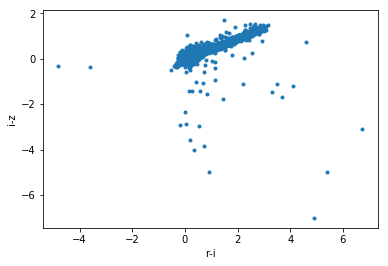

In [13]:
plt.scatter(goldr[idx][np.where(d2d < matchlim)]-goldi[idx][np.where(d2d < matchlim)], goldi[idx][np.where(d2d < matchlim)]-goldz[idx][np.where(d2d < matchlim)], marker='.')
plt.xlabel('r-i')
plt.ylabel('i-z')

In [14]:
def compute_res(d):

    de1 =  d['obs_e1']-d[prefix+'_e1']
    de2 =  d['obs_e2']-d[prefix+'_e2']
    dt =  (d['obs_T']-d[prefix+'_T'])
    dtfrac = dt/d['obs_T']
    print('mean de = ',np.mean(de1),np.mean(de2))
    print('mean dt = ',np.mean(dt))

    return dtfrac, dt,  de1, de2

In [15]:
fracsizeres, sizeres, e1res, e2res=compute_res(thisdata)
#fracsizeres, sizeres, e1res, e2res=compute_res(data[np.where(d2d < matchlim)])

mean de =  8.86171303611e-05 -6.83928557931e-07
mean dt =  -0.000206310695303


In [16]:
print(goldr[idx][np.where(d2d < matchlim)]-goldi[idx][np.where(d2d < matchlim)])
print(goldi[idx][np.where(d2d < matchlim)]-goldz[idx][np.where(d2d < matchlim)])
print(min(goldr[idx][np.where(d2d < matchlim)]-goldi[idx][np.where(d2d < matchlim)]))
print(min(goldi[idx][np.where(d2d < matchlim)]-goldz[idx][np.where(d2d < matchlim)]))

[ 1.12046948  1.04992418  0.86566223 ...,  1.50167939  0.06511439
  1.04726813]
[ 0.45886934  0.45608698  0.35878291 ...,  0.63017055  0.00256083
  0.44135157]
-4.81212597446
-6.99783751591


In [17]:
#want psf vs colour:  #r-i with r or i band psfs and i-z for x-psf
def bin_by_col(m, dT, dTfrac, de1, de2, min_mused):
    min_mag = -0.5 #min(m)
    max_mag = 2 #max(m)
     
    mag_bins = np.linspace(min_mag, max_mag,51)
    print('col_bins = ',mag_bins)

    index = np.digitize(m, mag_bins)
    print('len(index) = ',len(index))
    bin_de1 = [de1[index == i].mean() for i in range(1, len(mag_bins))]
    print('bin_de1 = ',bin_de1)
    bin_de2 = [de2[index == i].mean() for i in range(1, len(mag_bins))]
    print('bin_de2 = ',bin_de2)
    bin_dT = [dT[index == i].mean() for i in range(1, len(mag_bins))]
    print('bin_dT = ',bin_dT)
    bin_dTfrac = [dTfrac[index == i].mean() for i in range(1, len(mag_bins))]
    print('bin_dTfrac = ',bin_dTfrac)
    bin_de1_err = [ np.sqrt(de1[index == i].var() / len(de1[index == i]))
                    for i in range(1, len(mag_bins)) ]
    print('bin_de1_err = ',bin_de1_err)
    bin_de2_err = [ np.sqrt(de2[index == i].var() / len(de2[index == i]))
                    for i in range(1, len(mag_bins)) ]
    print('bin_de2_err = ',bin_de2_err)
    bin_dT_err = [ np.sqrt(dT[index == i].var() / len(dT[index == i]))
                    for i in range(1, len(mag_bins)) ]
    print('bin_dT_err = ',bin_dT_err)
    bin_dTfrac_err = [ np.sqrt(dTfrac[index == i].var() / len(dTfrac[index == i]))
                    for i in range(1, len(mag_bins)) ]
    print('bin_dTfrac_err = ',bin_dTfrac_err)

    # Fix up nans
    for i in range(1,len(mag_bins)):
        if i not in index:
            bin_de1[i-1] = 0.
            bin_de2[i-1] = 0.
            bin_dT[i-1] = 0.
            bin_dTfrac[i-1] = 0.
            bin_de1_err[i-1] = 0.
            bin_de2_err[i-1] = 0.
            bin_dT_err[i-1] = 0.
            bin_dTfrac_err[i-1] = 0.


    fig, axes = plt.subplots(3,1, sharex=True)
    
    ax = axes[0]
    #ax.set_ylim(-0.002,0.002)
    ax.plot([min_mag,max_mag], [0,0], color='black')
    #ax.plot([min_mused,min_mused],[-1,1], color='Grey')
    #ax.fill( [min_mag,min_mag,min_mused,min_mused], [-1,1,1,-1], fill=True, color='Grey',alpha=0.3)
    t_line = ax.errorbar(mag_bins[:-1], bin_dT, yerr=bin_dT_err, color='darkturquoise', fmt='o')
    #ax.axhline(y=0.003, linewidth=4, color='grey')
    #ax.legend([t_line], [r'$\delta T$'])
    ax.set_ylabel(r'$(T_{\rm PSF} - T_{\rm model}) \quad({\rm arcsec}^2)$')

    ax = axes[1]
    #ax.set_ylim(-0.002,0.002)
    ax.plot([min_mag,max_mag], [0,0], color='black')
    #ax.plot([min_mused,min_mused],[-1,1], color='Grey')
    #ax.fill( [min_mag,min_mag,min_mused,min_mused], [-1,1,1,-1], fill=True, color='Grey',alpha=0.3)
    t_line = ax.errorbar(mag_bins[:-1], bin_dTfrac, yerr=bin_dTfrac_err, color='darkturquoise', fmt='o')
    #ax.legend([t_line], [r'$\delta T$'])
    ax.set_ylabel(r'$(T_{\rm PSF} - T_{\rm model})/ T_{\rm PSF}$')

    ax = axes[2]
    #ax.set_ylim(-3.e-4,4.e-4)
    ax.plot([min_mag,max_mag], [0,0], color='black')
    ax.plot([min_mused,min_mused],[-1,1], color='Grey')
    #ax.fill( [min_mag,min_mag,min_mused,min_mused], [-1,1,1,-1], fill=True, color='Grey',alpha=0.3)
    e1_line = ax.errorbar(mag_bins[:-1], bin_de1, yerr=bin_de1_err, color='purple', fmt='o')
    e2_line = ax.errorbar(mag_bins[:-1], bin_de2, yerr=bin_de2_err, color='orange', fmt='o')
    #ax.axhline(y=0.0002, linewidth=4, color='grey')
    #ax.axhline(y=-0.0002, linewidth=4, color='grey')
    ax.legend([e1_line, e2_line], [r'$e_1$', r'$e_2$'])
    ax.set_ylabel(r'$e_{\rm PSF} - e_{\rm model}$')
    ax.set_ylim(-0.015,0.02)
    ax.set_xlim(min_mag,max_mag)
    ax.set_xlabel('r-i')

    fig.set_size_inches(7.0,12.0)
    plt.tight_layout()
    plt.savefig('dpsf_colour.pdf')
    plt.show()

col_bins =  [-0.5  -0.45 -0.4  -0.35 -0.3  -0.25 -0.2  -0.15 -0.1  -0.05  0.    0.05
  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55  0.6   0.65
  0.7   0.75  0.8   0.85  0.9   0.95  1.    1.05  1.1   1.15  1.2   1.25
  1.3   1.35  1.4   1.45  1.5   1.55  1.6   1.65  1.7   1.75  1.8   1.85
  1.9   1.95  2.  ]
len(index) =  92056
bin_de1 =  [nan, -0.0046220675865775163, -3.9285415711696851e-05, 0.0024906393463541418, -9.8124344406246711e-05, 0.002484840621645635, -0.0018816915942531875, 0.00064901269838038838, 0.00065505127061236143, 0.0011929080994558853, 0.00063416739808546676, 0.00014477536767847548, 0.00031204566947403908, 0.00017195740223766555, 0.0001336641367828523, 0.00013477190830879892, 0.00023654116995821788, 0.00011989564992067329, -5.2515701547965236e-05, 0.00013746609244753131, 0.000432219162397611, -6.4747799091835073e-06, -0.00034318401241091454, 0.00051964841826839599, -5.532120798890951e-05, 5.2357677493559477e-05, -0.00023971963737361154, 5.52677506327766

/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice.
  # This is added back by InteractiveShellApp.init_path()
/global/homes/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice.
  del sys.path[0]
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice.
  from ipykernel import kernelapp as app
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: Mean of empty slice.
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: Degrees of freedom <= 0 for slice
/global/homes/a/aamon/.conda/env

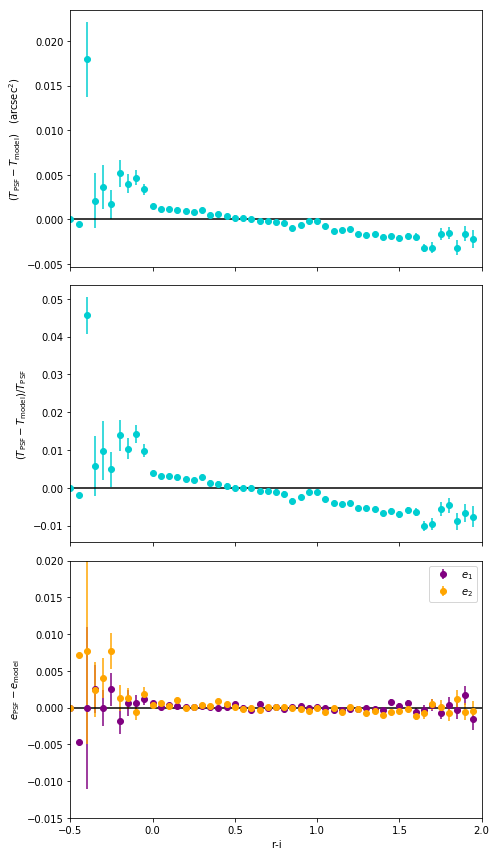

In [18]:
#bin_by_col(goldr[idx][np.where(d2d < matchlim)]-goldi[idx][np.where(d2d < matchlim)], sizeres, fracsizeres, e1res, e2res, 15)
bin_by_col(thisgoldr-thisgoldi, sizeres, fracsizeres, e1res, e2res, 15)

In [19]:
#! /usr/bin/env python
# Compute rho statistics on PSFEx outputs.
# This involves creating catalogs of shapes based on the PSFEx files, and then using
# TreeCorr to compute the correlation functions.

from __future__ import print_function
import os
import numpy as np
#from read_psf_cats import read_data, band_combinations
import fitsio
import treecorr
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
from astropy.io import fits
import h5py as h